In [137]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def show_figure(df, y, model):
    feature_names = df.columns
    labels = y.unique()
    plt.figure(figsize = (15,10))
    a = tree.plot_tree(model,
        feature_names = feature_names,
        class_names = labels,
        rounded = True,
        filled = True,
        fontsize=8)
    plt.show()

## Question 3:

### First dataset $diabetes.csv$:

In [138]:
df1 = pd.read_csv('diabetes.csv')
Y1 = df1['class']
X1 = df1.drop(['class'], axis = 1)
df1

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


#### One level decision tree:
Accuracy: 0.721

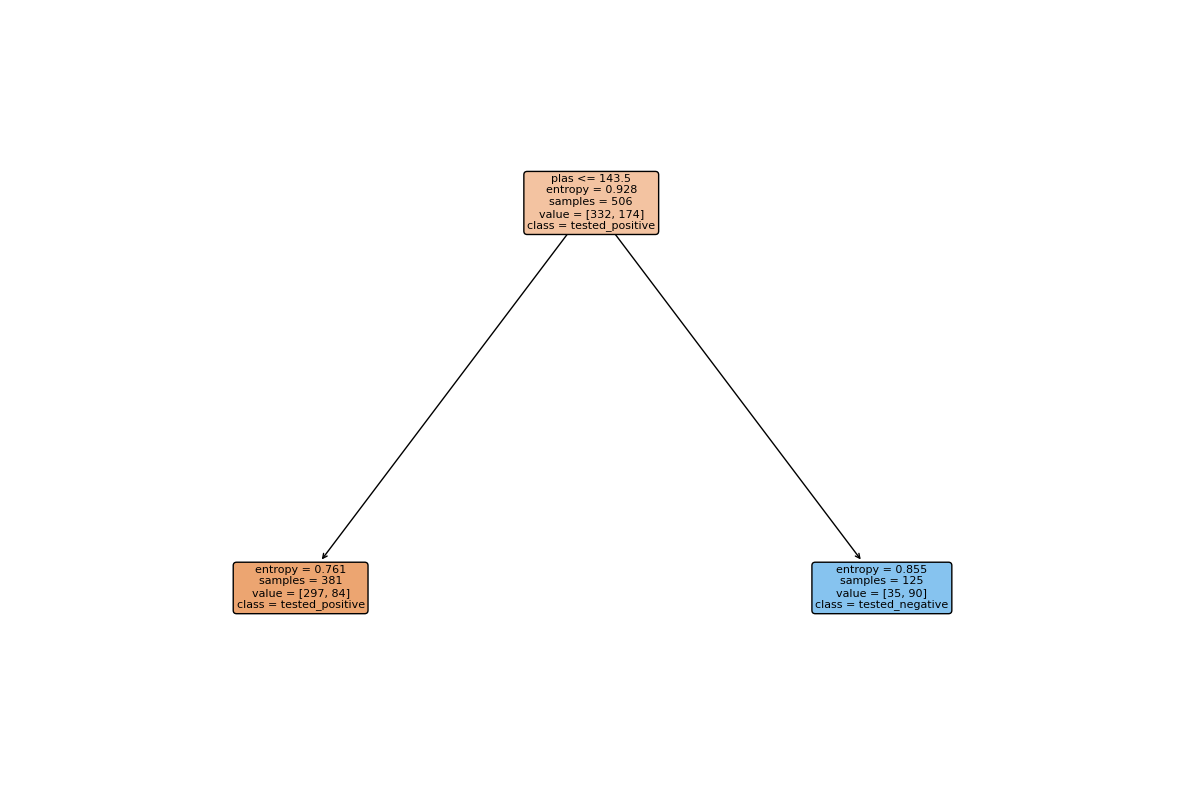

0.7213740458015268

In [139]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.34, random_state=10)
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf = clf.fit(X_train, Y_train)
show_figure(df1, Y1, clf)
Yp = clf.predict(X_test)
accuracy_score(Y_test,Yp)

#### Multi-level decision tree with min_samples_leaf = 1:
Accuracy: 0.748

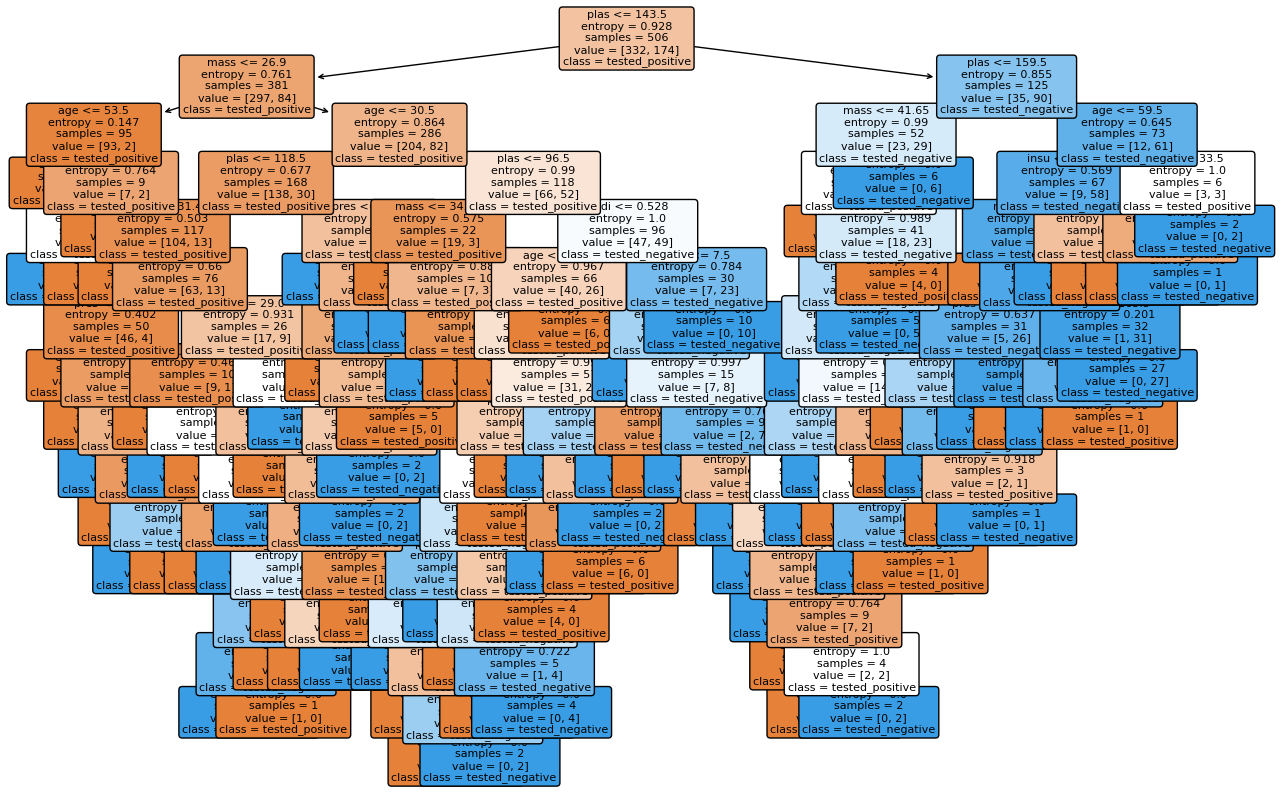

0.7404580152671756

In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.34, random_state=10)
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, Y_train)
show_figure(df1, Y1, clf)
Yp = clf.predict(X_test)
accuracy_score(Y_test,Yp)

### Second dataset $glass.csv$:

In [141]:
df2 = pd.read_csv('glass.csv')
Y2 = df2['class']
X2 = df2.drop(['class'], axis = 1)
df2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,'build wind float'
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,'vehic wind float'
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,'build wind float'
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,'build wind non-float'
...,...,...,...,...,...,...,...,...,...,...
209,1.51610,13.42,3.40,1.22,72.69,0.59,8.32,0.0,0.00,'vehic wind float'
210,1.51592,12.86,3.52,2.12,72.66,0.69,7.97,0.0,0.00,'build wind non-float'
211,1.51613,13.92,3.52,1.25,72.88,0.37,7.94,0.0,0.14,'build wind non-float'
212,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.0,0.00,'build wind non-float'


#### One level decision tree:
Accuracy: 0.425

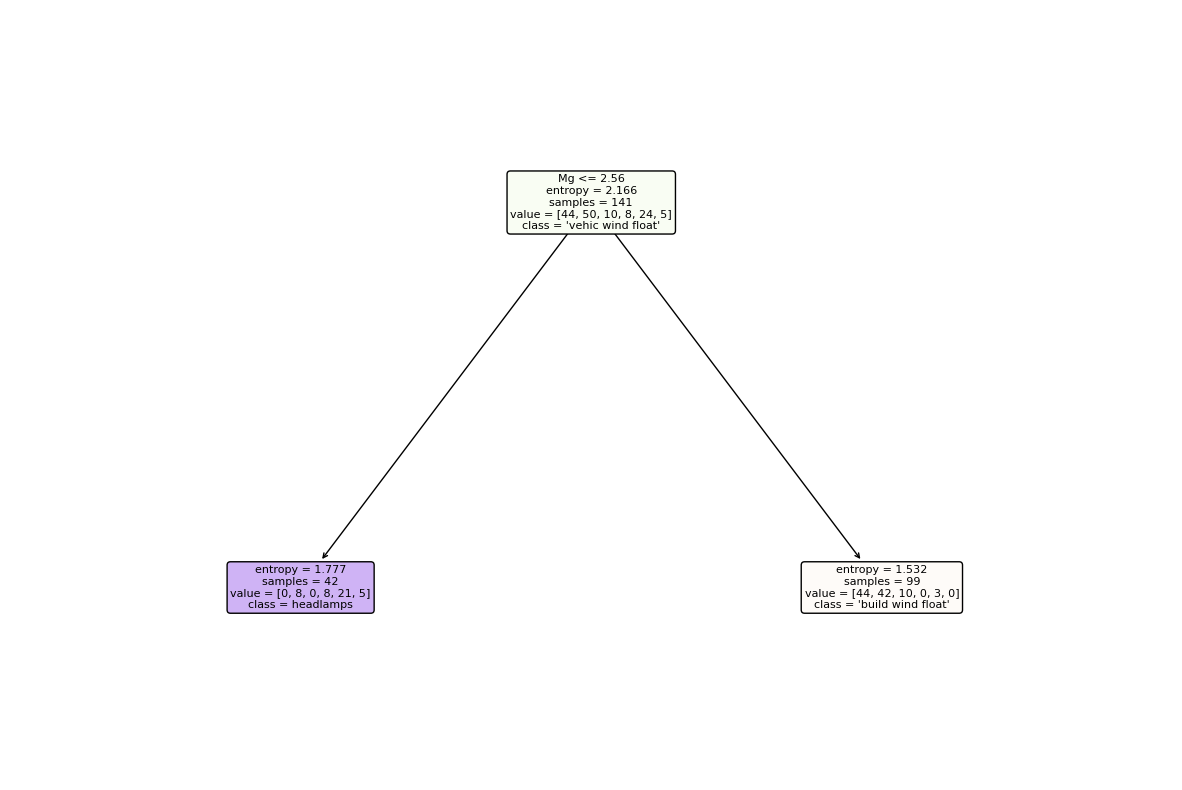

0.4246575342465753

In [142]:
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, test_size=0.34, random_state=10)
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf = clf.fit(X_train, Y_train)
show_figure(df2, Y2, clf)
Yp = clf.predict(X_test)
accuracy_score(Y_test,Yp)

#### Multi-level decision tree with min_samples_leaf = 1:
Accuracy: 0.548

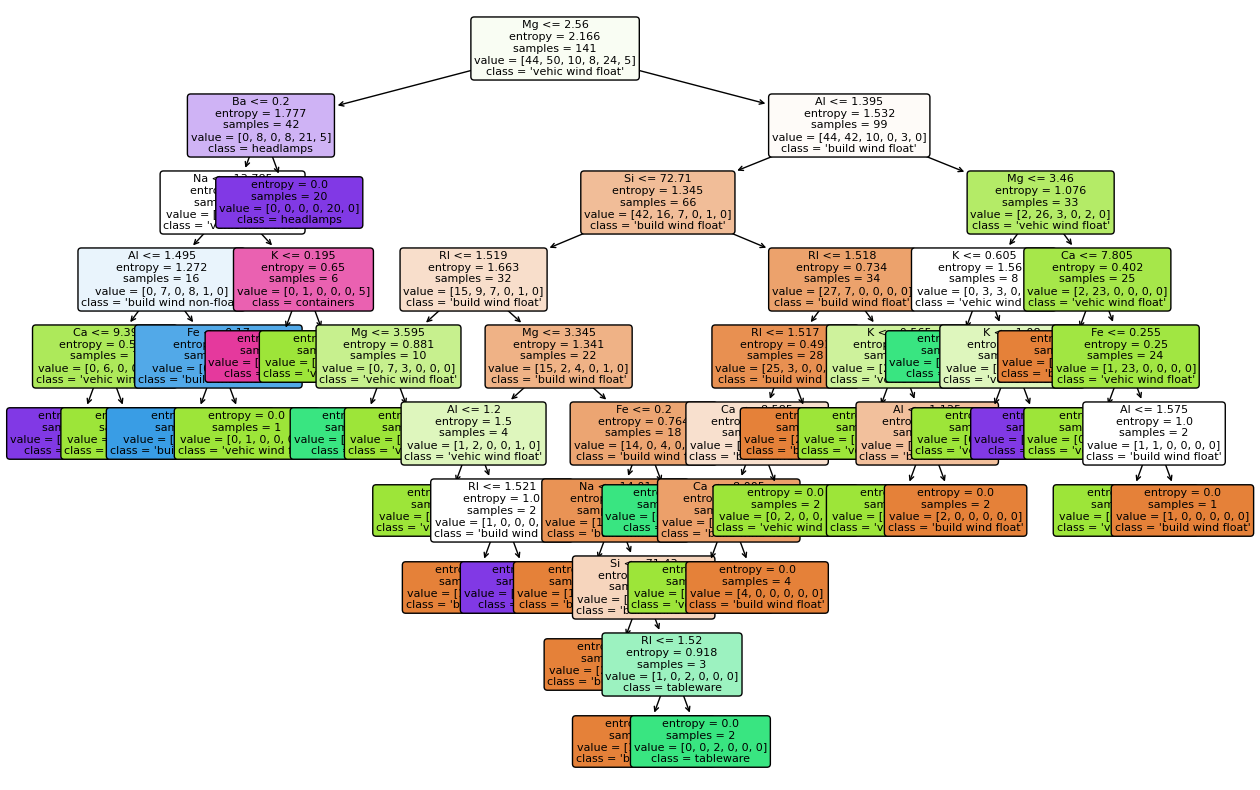

0.547945205479452

In [143]:
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, test_size=0.34, random_state=10)
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, Y_train)
show_figure(df2, Y2, clf)
Yp = clf.predict(X_test)
accuracy_score(Y_test,Yp)

## Task d

In [144]:
import numpy as np

def hold_out_val(X, Y, min_samples_leaf):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)
    clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf)
    clf = clf.fit(X_train, Y_train)
    Yp = clf.predict(X_test)
    return accuracy_score(Y_test,Yp)

def plot_diagram(x,y):
    y_min = np.argmin(y)
    y_max = np.argmax(y)
    show_min='['+str(x[y_min])+', '+str(y[y_min])+']'
    show_max='['+str(x[y_max])+', '+str(y[y_max])+']'

    plt.plot(x[y_max],y[y_max],'x')
    plt.plot(x[y_min],y[y_min],'x')
    plt.plot(x,y)
    plt.annotate(show_max,xy=(x[y_max],y[y_max]),xytext=(x[y_max],y[y_max]))
    plt.annotate(show_max,xy=(x[y_min],y[y_min]),xytext=(x[y_min],y[y_min]))
    plt.show()

### First dataset $diabetes.csv$:

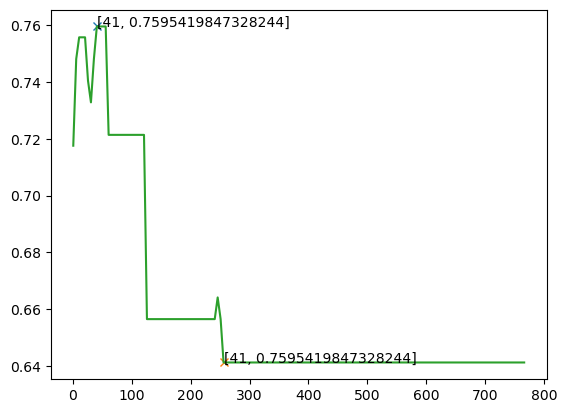

In [145]:
x = np.array([i for i in range(1,len(df1),5)])
y = np.array([hold_out_val(X1,Y1,xi) for xi in x])

plot_diagram(x,y)

### Second dataset $glass.csv$:

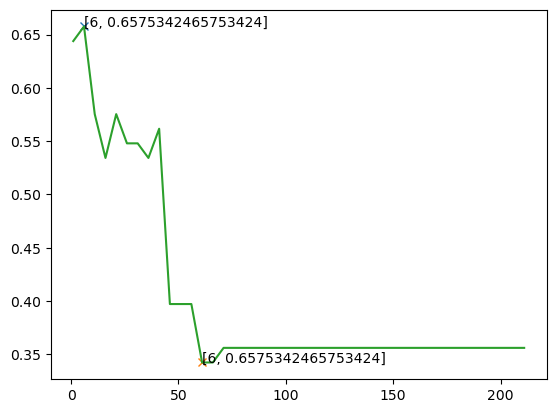

In [146]:
x = np.array([i for i in range(1,len(df2),5)])
y = np.array([hold_out_val(X2,Y2,xi) for xi in x])

plot_diagram(x,y)

[0. 1.] [nan nan] nan


c:\Users\AnkieF\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


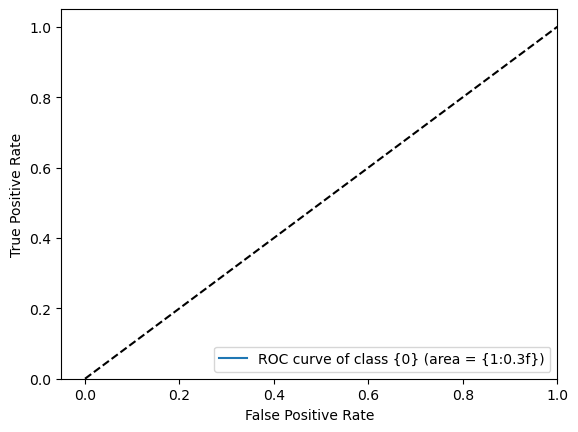

In [183]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


Y1 = label_binarize(Y1, classes=[0, 1])
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.34, random_state=10)
clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1)
clf = clf.fit(X_train, Y_train)
Y_score = clf.predict_proba(X_test)

fpr, tpr , threshold= roc_curve(Y_test, Y_score, pos_label=1)
roc_auc = auc(fpr,tpr)
print(fpr,tpr,roc_auc)

plt.plot(fpr, tpr, label='ROC curve of class {0} (area = {1:0.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
